### **Teoría y Lógica de Programación**


*   Docente: Carlos Arturo Jiménez
*   Santiago Bravo Cardenas Cod. 20232579020

De acuerdo a la información suministrada, generar los siguientes mapa en Colombia, no hay necesidad de usar la librería Folium.



*   Mapa de Deslizamientos.
*   Mapa de Caída de Rocas.
*   Mapa de Flujo de lodo.

El archivo "inventario_de...." tiene coordenadas X, Y. Deben de pasarlo a geopandas, para eso usan chatgpt.

In [365]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import gdown
import matplotlib.pyplot as plt

In [366]:
# URL del archivo en Google Drive
url = 'https://drive.google.com/uc?id=1fJ7vWfH91UOue1u1F1LR5OU6GpO84g2j'
output = 'Inventario_de_movimientos_en_masa.csv'
gdown.download(url, output, quiet=False)
data = gpd.read_file(output)

Downloading...
From: https://drive.google.com/uc?id=1fJ7vWfH91UOue1u1F1LR5OU6GpO84g2j
To: /content/Inventario_de_movimientos_en_masa.csv
100%|██████████| 849k/849k [00:00<00:00, 34.7MB/s]


In [367]:
datos = pd.read_csv("https://drive.google.com/uc?id=1fJ7vWfH91UOue1u1F1LR5OU6GpO84g2j") #Lee el archivo CSV que contiene las coordenadas X,Y
#Crea una nueva columna en el DataFrame para almacenar la geometría de los puntos.
geometria = gpd.GeoDataFrame(geometry=gpd.points_from_xy(datos["X"], datos["Y"]))
#Combina el DataFrame original con la geometría creada en un nuevo GeoDataFrame
geo_datos = datos.set_geometry(geometria["geometry"])
geo_datos

,X,Y,FID,OBJECTID,ID,INV_MOVIMI,F35DOV_TIP,TIPO,SUBTIPO_MO,SUBTIPO,CLAS_MAPA,ETIQUETA_M,ESRI_OID,geometry
0,-8.430070e+06,258331.8206,1,-7.583971e+56,1752,31553,69,Deslizamiento,4,Deslizamiento traslacional,Deslizamiento,dt,130,POINT (-8430070.427 258331.821)
1,-8.442006e+06,251832.9895,2,-7.583971e+56,1753,31534,67,Caida,20,Caida de detritos,Caida,cd,131,POINT (-8442006.351 251832.990)
2,-8.442965e+06,256351.1963,3,-7.583971e+56,1754,31551,69,Deslizamiento,82,Deslizamiento traslacional planar,Deslizamiento,dtp,132,POINT (-8442964.935 256351.196)
3,-8.442625e+06,255639.4155,4,-7.583971e+56,1755,31540,67,Caida,15,Caida de roca,Caida,cr,133,POINT (-8442624.792 255639.416)
4,-8.442501e+06,255391.8404,5,-7.583971e+56,1757,31538,67,Caida,15,Caida de roca,Caida,cr,134,POINT (-8442501.104 255391.840)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,-8.087309e+06,893729.7971,6822,-7.583971e+56,9752,33421,67,Caida,15,Caida de roca,Caida,cr,4706,POINT (-8087309.057 893729.797)
6822,-8.085279e+06,894243.1578,6823,-7.583971e+56,9753,33422,69,Deslizamiento,3,Deslizamiento rotacional,Deslizamiento rotacional,dr,4707,POINT (-8085279.022 894243.158)
6823,-8.105146e+06,882553.4416,6824,-7.583971e+56,9754,33423,69,Deslizamiento,4,Deslizamiento traslacional,Deslizamiento,dt,4708,POINT (-8105146.150 882553.442)
6824,-8.086502e+06,882667.7018,6825,-7.583971e+56,9755,33424,69,Deslizamiento,3,Deslizamiento rotacional,Deslizamiento rotacional,dr,4709,POINT (-8086501.991 882667.702)


<Axes: >

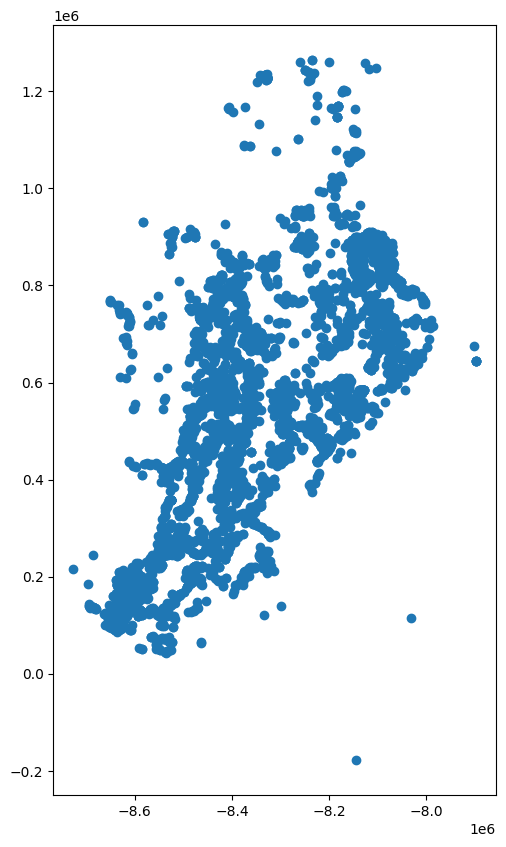

In [368]:
geo_datos.plot(aspect=1,figsize=(10,10))

<Axes: >

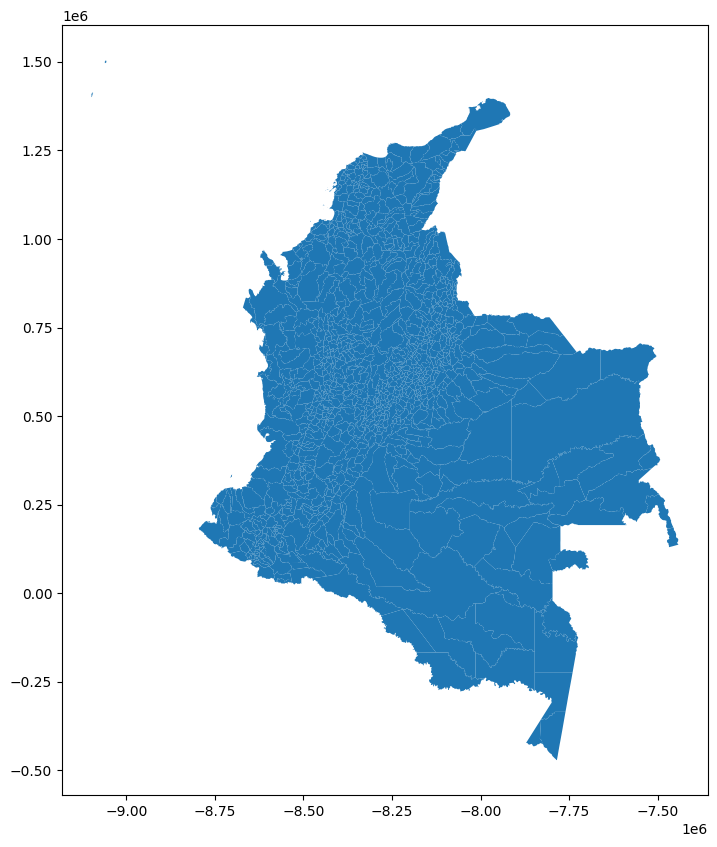

In [369]:
municipios=gpd.read_file("/content/drive/MyDrive/SEMANA 11 /COL_Municipio.zip")
municipios.plot(figsize=(10,10))

<Axes: >

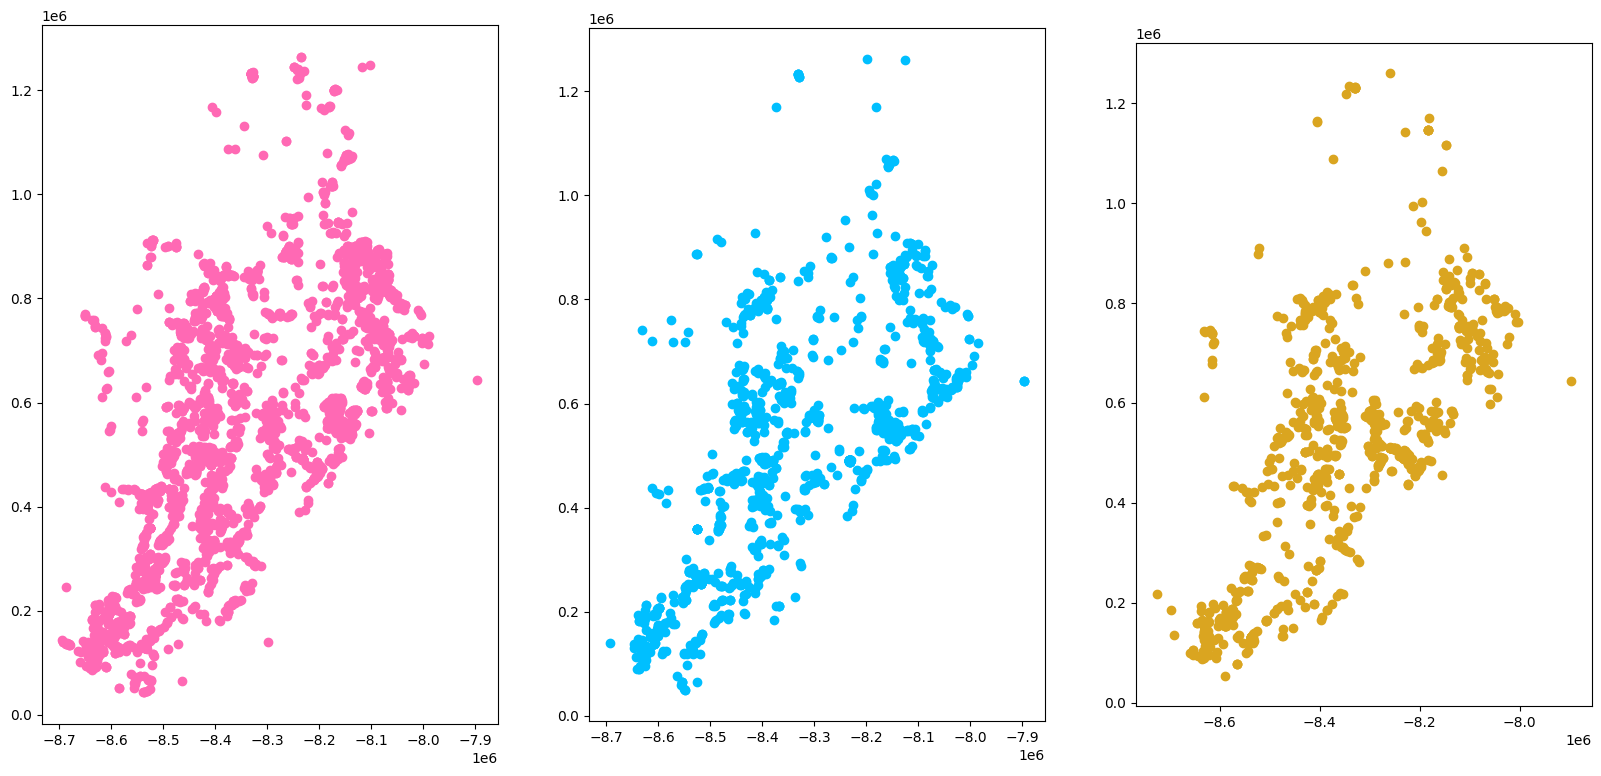

In [370]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 50))
deslizamientos = geo_datos[geo_datos['TIPO'] == 'Deslizamiento']
deslizamientos.plot(aspect=1,ax=ax1, color='hotpink')
Caida= geo_datos[geo_datos['TIPO'] == 'Caida']
Caida.plot(aspect=1,ax=ax2, color='deepskyblue')
Flujo= geo_datos[geo_datos['TIPO'] == 'Flujo']
Flujo.plot(aspect=1,ax=ax3, color='goldenrod')

Text(0.5, 1.0, 'Flujo de Lodo')

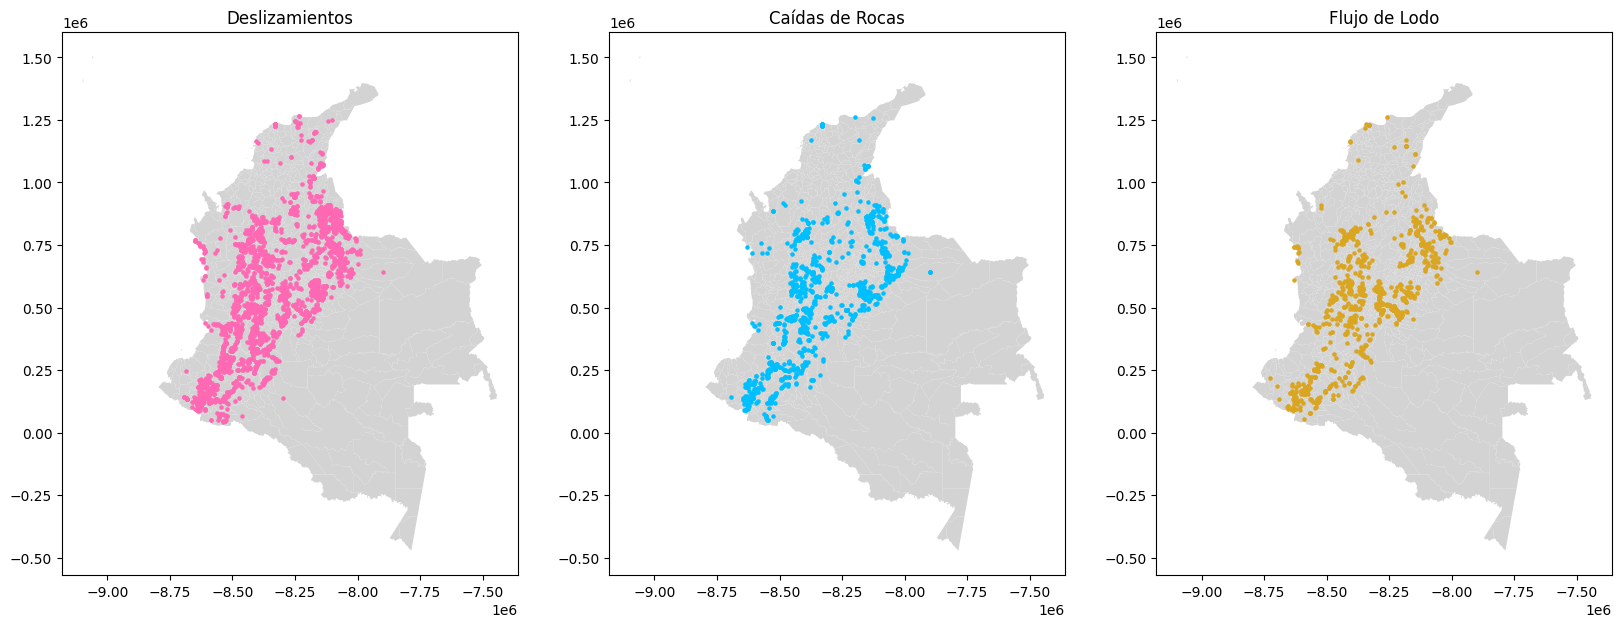

In [371]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 50))
municipios.plot(ax=ax1, color='lightgrey')
deslizamientos.plot(ax=ax1, color='hotpink', marker='o', markersize=5)
ax1.set_title('Deslizamientos')

municipios.plot(ax=ax2, color='lightgrey')
Caida.plot(ax=ax2, color='deepskyblue', marker='o', markersize=5)
ax2.set_title('Caídas de Rocas')

municipios.plot(ax=ax3, color='lightgrey')
Flujo.plot(ax=ax3, color='goldenrod', marker='o', markersize=5)
ax3.set_title('Flujo de Lodo')